<a href="https://colab.research.google.com/github/rahulyad011/CSE589-MNC-PA/blob/master/Notebooks/phase2/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
#classifiers
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
#preprocessing and data handling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
# plotting and evaluation
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, roc_curve, auc, roc_auc_score, RocCurveDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/DIC_project/phase2_data/music_data_preprocessed.csv')
df.head()

,key_A,key_A#,key_B,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,...,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,positivity,music_genre
0,0,1,0,0,0,0,0,0,0,0,...,-0.883886,0.524878,-1.719534,1.289876,1.875809,-0.488113,0.638132,-0.185322,1.225073,5
1,0,0,0,0,0,1,0,0,0,0,...,-0.860390,0.356933,-0.023001,1.097101,2.361357,-0.432433,0.339248,-0.627258,0.302431,5
2,0,0,0,0,0,0,0,0,0,0,...,-0.888632,0.345737,-0.043830,0.586813,-0.521812,2.104140,0.732892,-0.582867,-0.498812,5
3,0,0,0,0,1,0,0,0,0,0,...,-0.823184,1.207853,-0.422611,0.378918,-0.550300,-0.228269,0.752201,1.434452,-0.753752,5
4,0,0,0,0,0,0,0,0,0,1,...,-0.883974,0.446504,0.008676,-0.048212,2.235361,-0.228269,0.465324,-0.515787,-0.539278,5


In [4]:
df.dropna(inplace=True)
df.reset_index(drop=True,inplace=True)

In [5]:
df.drop(columns=['key_G#', 'mode_Minor'],inplace=True)

In [6]:
df.reset_index(drop=True,inplace=True)

In [7]:
# 5 - electronic
# 1 - anime
# 7 - jazz
# 0 - alternative
# 4 - country
# 8 - rap
# 2 - blues
# 9 - rock
# 3 - classical
# 6 - Hip-Hop

In [8]:
def combine_genre(genre):
    if genre == 9: #Combine Rock and Alternative
        return 0
    elif genre == 8: #Combine Hip-Hop and Rap
        return 6
    else:
        return genre

In [9]:
df['music_genre'] = df['music_genre'].apply(lambda x: combine_genre(x))

In [10]:
df['music_genre'].value_counts()

0    9990
6    9927
4    4999
1    4994
7    4979
5    4976
2    4970
3    4842
Name: music_genre, dtype: int64

In [11]:
data = df.copy()

In [12]:
print(len(data))
data.reset_index(drop=True,inplace=True)


49677


In [13]:
y=data.iloc[:, -1]
X=data.iloc[:, :-1]

In [14]:
print(X.shape)
print(y.shape)

(49677, 27)
(49677,)


In [15]:
X.columns

Index(['key_A', 'key_A#', 'key_B', 'key_C', 'key_C#', 'key_D', 'key_D#',
       'key_E', 'key_F', 'key_F#', 'key_G', 'mode_Major', 'tempo_34-71',
       'tempo_71-108', 'tempo_108-145', 'tempo_145-183', 'tempo_183-220',
       'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'positivity'],
      dtype='object')

In [16]:
print(y.value_counts())

0    9990
6    9927
4    4999
1    4994
7    4979
5    4976
2    4970
3    4842
Name: music_genre, dtype: int64


In [17]:
print(y.shape)
print(X.shape)

(49677,)
(49677, 27)


In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [19]:
y.unique()

array([5, 1, 7, 0, 4, 6, 2, 3])

In [20]:
def evaluation(clf, y_true):
  y_pred = clf.predict(X_test)
  print("accuracy: ",accuracy_score(y_true, y_pred))
  print("recall: ",recall_score(y_true, y_pred, average='macro'))
  print("precision: ",precision_score(y_true, y_pred,  average='macro'))
  print("f1 score: ",f1_score(y_true, y_pred, average='macro'))
  print("--------------------------")
  print("classification report:")
  print(classification_report(y_true, y_pred))
  cm = confusion_matrix(y_true, y_pred, labels=clf.classes_)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                display_labels=clf.classes_)
  disp.plot()
  plt.show()

In [ ]:
# Define the SVM classifier
svm_classifier = SVC()

# Hyperparameter input for grid
param_grid = {
    'C': [0.1, 1, 10],      # Regularization parameter
    'kernel': ['linear', 'rbf'],  # Kernel types
}

# Grid search
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5, n_jobs=-1)

# Execute
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [ ]:
# Retrieve the best parameters
best_params = grid_search.best_params_
best_params

{'C': 1, 'kernel': 'rbf'}

In [ ]:
best_params = {'C': 1, 'kernel': 'rbf'}

accuracy:  0.6912238325281803
recall:  0.6626699844779587
precision:  0.68664327535996
f1 score:  0.6711891108429509
--------------------------
classification report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      2498
           1       0.76      0.74      0.75      1249
           2       0.61      0.54      0.57      1242
           3       0.85      0.85      0.85      1210
           4       0.60      0.46      0.52      1250
           5       0.68      0.61      0.64      1244
           6       0.82      0.85      0.84      2482
           7       0.58      0.49      0.53      1245

    accuracy                           0.69     12420
   macro avg       0.69      0.66      0.67     12420
weighted avg       0.69      0.69      0.69     12420



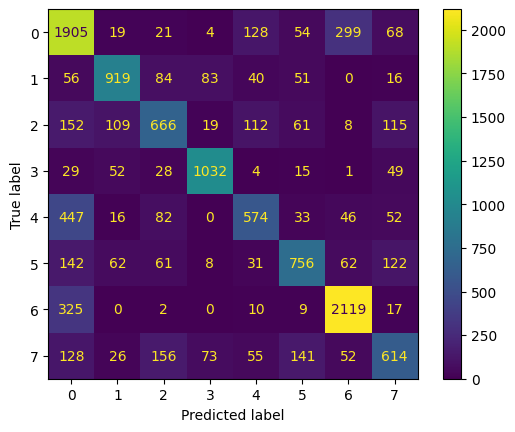

In [ ]:
best_svm_classifier = SVC(**best_params)
best_svm_classifier.fit(X_train, y_train)
evaluation(best_svm_classifier, y_test)

KNN

In [ ]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier

In [ ]:
max_k = 10
f1_scores = list()
error_rates = list()

# keep initialiting the KNN and look at the F1 score and look at the one that maximises it
for k in range(2, max_k):

    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn = knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)
    f1 = f1_score(y_pred, y_test, average='weighted')
    print(f'k: {k} ; f1: {f1}')
    f1_scores.append((k, round(f1, 4)))
    error = 1-round(accuracy_score(y_test, y_pred), 4)
    error_rates.append((k, error))

f1_results = pd.DataFrame(f1_scores, columns=['K', 'F1 Score'])
error_results = pd.DataFrame(error_rates, columns=['K', 'Error Rate'])

k: 2 ; f1: 0.5392568426383406
k: 3 ; f1: 0.5720076787877646
k: 4 ; f1: 0.5905764526749765
k: 5 ; f1: 0.6002493532369978
k: 6 ; f1: 0.6101890836257727
k: 7 ; f1: 0.6149232424598191
k: 8 ; f1: 0.6152664317129078
k: 9 ; f1: 0.6186505052812389


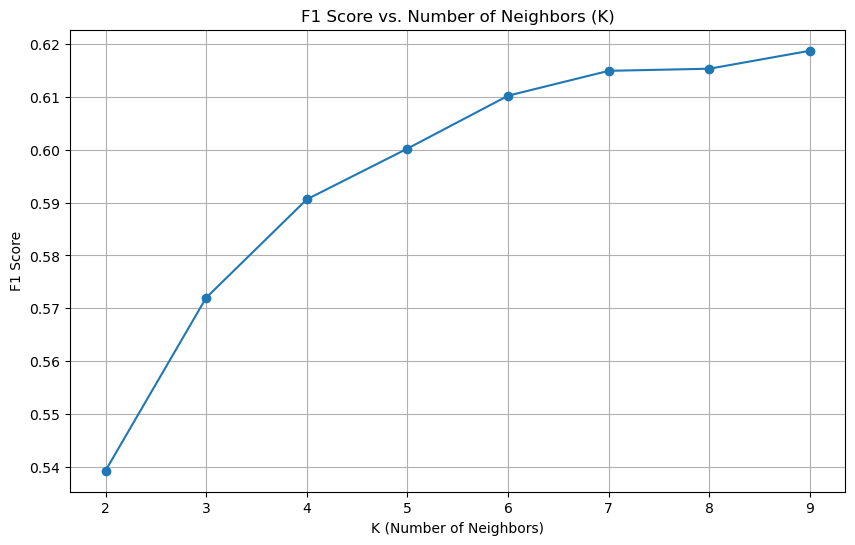

In [ ]:
k_values = f1_results['K']
f1_scores = f1_results['F1 Score']

# Create a line plot of F1 scores against K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, f1_scores, marker='o', linestyle='-')
plt.title('F1 Score vs. Number of Neighbors (K)')
plt.xlabel('K (Number of Neighbors)')
plt.ylabel('F1 Score')
plt.grid(True)
plt.show()

accuracy:  0.6117552334943639
recall:  0.5852132219462687
precision:  0.6015099237938575
f1 score:  0.5906625117587971
--------------------------
classification report:
              precision    recall  f1-score   support

           0       0.54      0.62      0.58      2498
           1       0.69      0.63      0.66      1249
           2       0.51      0.43      0.46      1242
           3       0.79      0.83      0.81      1210
           4       0.40      0.44      0.42      1250
           5       0.60      0.49      0.54      1244
           6       0.76      0.82      0.79      2482
           7       0.52      0.42      0.47      1245

    accuracy                           0.61     12420
   macro avg       0.60      0.59      0.59     12420
weighted avg       0.61      0.61      0.61     12420



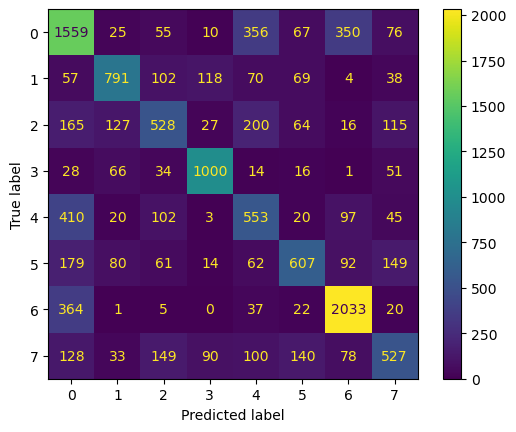

In [ ]:
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn.fit(X_train, y_train)
evaluation(knn, y_test)

Random Forest

In [ ]:
rf_classifier = RandomForestClassifier()

# Define a parameter grid to search
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at a leaf node
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

In [21]:
best_params = {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
# Train a Random Forest Classifier with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, min_samples_split=10, n_estimators=200)

accuracy:  0.7006441223832528
recall:  0.6714909558076607
precision:  0.693426161565331
f1 score:  0.6795854030570487
--------------------------
classification report:
              precision    recall  f1-score   support

           0       0.61      0.76      0.68      2498
           1       0.78      0.76      0.77      1249
           2       0.62      0.54      0.57      1242
           3       0.84      0.85      0.85      1210
           4       0.62      0.50      0.55      1250
           5       0.67      0.60      0.63      1244
           6       0.84      0.88      0.86      2482
           7       0.57      0.49      0.52      1245

    accuracy                           0.70     12420
   macro avg       0.69      0.67      0.68     12420
weighted avg       0.70      0.70      0.70     12420



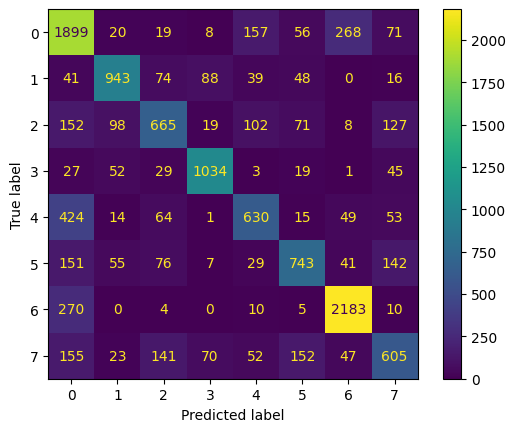

In [22]:
evaluation(best_rf_classifier, y_test)

GradientBoost

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.1],
    'max_depth': [3, 5, 7]
}

gb_classifier = GradientBoostingClassifier(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(gb_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 150}


GradientBoostingClassifier(n_estimators=150, random_state=42)

In [ ]:
# Fetch the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Train the classifier with the best hyperparameters
best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_classifier.fit(X_train, y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


In [23]:
best_params = {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
best_gb_classifier = GradientBoostingClassifier(**best_params, random_state=42)
best_gb_classifier.fit(X_train, y_train)

GradientBoostingClassifier(n_estimators=200, random_state=42)

accuracy:  0.7044283413848631
recall:  0.6785509135818
precision:  0.6989416178385811
f1 score:  0.6869111717038672
--------------------------
classification report:
              precision    recall  f1-score   support

           0       0.62      0.75      0.68      2498
           1       0.81      0.76      0.79      1249
           2       0.61      0.54      0.58      1242
           3       0.86      0.84      0.85      1210
           4       0.60      0.55      0.58      1250
           5       0.69      0.61      0.65      1244
           6       0.84      0.87      0.86      2482
           7       0.56      0.50      0.53      1245

    accuracy                           0.70     12420
   macro avg       0.70      0.68      0.69     12420
weighted avg       0.70      0.70      0.70     12420



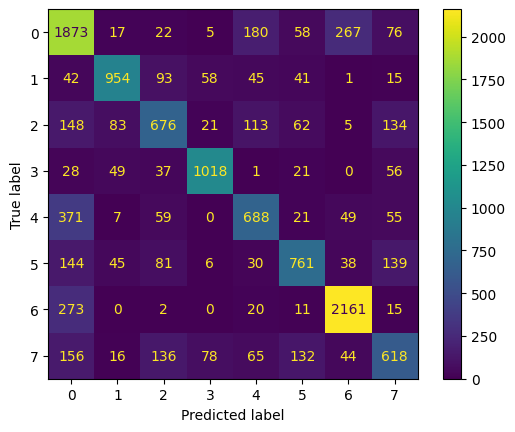

In [24]:
evaluation(best_gb_classifier, y_test)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['lbfgs'],
    'multi_class': ['multinomial'],
    'max_iter': [1000,2000,3000]
}

logreg_classifier = LogisticRegression(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(logreg_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'C': 10, 'max_iter': 1000, 'multi_class': 'multinomial', 'solver': 'lbfgs'}


In [ ]:
logreg_classifier = LogisticRegression(**best_params, random_state=42)
logreg_classifier.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000, multi_class='multinomial',
                   random_state=42)

accuracy:  0.6388888888888888
recall:  0.6070950923383301
precision:  0.619137097497456
f1 score:  0.61107389314218
--------------------------
classification report:
              precision    recall  f1-score   support

           0       0.59      0.71      0.65      2498
           1       0.62      0.63      0.62      1249
           2       0.51      0.46      0.49      1242
           3       0.79      0.80      0.80      1210
           4       0.49      0.45      0.47      1250
           5       0.61      0.57      0.59      1244
           6       0.81      0.82      0.82      2482
           7       0.53      0.41      0.46      1245

    accuracy                           0.64     12420
   macro avg       0.62      0.61      0.61     12420
weighted avg       0.63      0.64      0.63     12420



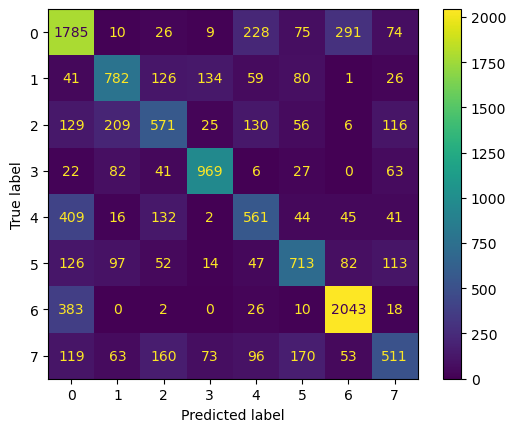

In [ ]:
evaluation(logreg_classifier, y_test)

***** Ensemble Learning *****

In [ ]:
ensemble_model = VotingClassifier(
    estimators=[('svc', best_svm_classifier), ('logistic', logreg_classifier), ('knn', knn), ('random_forest', best_rf_classifier)]
)

param_grid_ensemble = {
    'voting': ['hard', 'soft'],
    'weights': [[2, 1, 1, 1], [1, 1, 1, 2], [2, 1, 1, 2], [1, 2, 2, 1]],
}

# Use GridSearchCV to find the best hyperparameters for the ensemble model
grid_search_ensemble = GridSearchCV(ensemble_model, param_grid_ensemble, cv=3, scoring='accuracy')
grid_search_ensemble.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params_ensemble = grid_search_ensemble.best_params_
print(f"Best Hyperparameters for Ensemble Model: {best_params_ensemble}")

Best Hyperparameters for Ensemble Model: {'voting': 'hard', 'weights': [1, 1, 1, 2]}


In [ ]:
# Train an ensemble model with best fit params
ensemble_model = VotingClassifier(
    estimators=[('svc', best_svm_classifier), ('logistic', logreg_classifier), ('knn', knn), ('random_forest', best_rf_classifier)],
    voting='hard' ,
    weights=[1, 1, 1, 2]
)

ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('svc', SVC(C=1, probability=True)),
                             ('logistic',
                              LogisticRegression(C=10, max_iter=1000,
                                                 multi_class='multinomial',
                                                 random_state=42)),
                             ('knn',
                              KNeighborsClassifier(n_neighbors=7,
                                                   weights='distance')),
                             ('random_forest',
                              RandomForestClassifier(max_depth=20,
                                                     min_samples_split=10,
                                                     n_estimators=200))],
                 weights=[1, 1, 1, 2])

accuracy:  0.6935587761674719
recall:  0.6643170354841184
precision:  0.6872705819732854
f1 score:  0.6725430997981003
--------------------------
classification report:
              precision    recall  f1-score   support

           0       0.60      0.76      0.67      2498
           1       0.77      0.75      0.76      1249
           2       0.61      0.54      0.58      1242
           3       0.84      0.85      0.85      1210
           4       0.59      0.49      0.54      1250
           5       0.67      0.58      0.63      1244
           6       0.83      0.87      0.85      2482
           7       0.58      0.47      0.52      1245

    accuracy                           0.69     12420
   macro avg       0.69      0.66      0.67     12420
weighted avg       0.69      0.69      0.69     12420



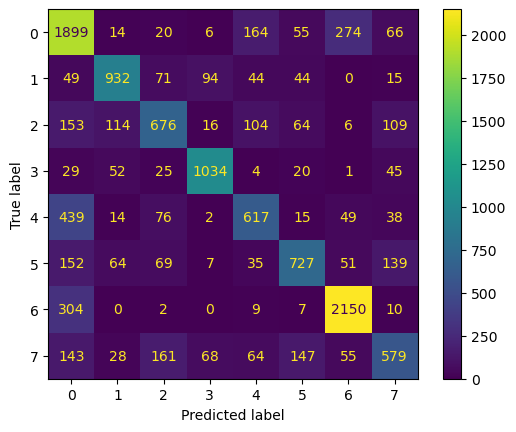

In [ ]:
evaluation(ensemble_model, y_test)

Ridge Classifier

In [ ]:
ridge_classifier = RidgeClassifier(random_state=42)

# Define the parameter grid to search
param_grid = {
    'alpha': [0.1, 1.0, 10.0],
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(ridge_classifier, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

Best Hyperparameters: {'alpha': 1.0, 'solver': 'sparse_cg'}


In [ ]:
ridge_classifier.set_params(**best_params)
ridge_classifier.fit(X_train, y_train)

RidgeClassifier(random_state=42, solver='sparse_cg')

accuracy:  0.57085346215781
recall:  0.5127905624464925
precision:  0.5703507623270592
f1 score:  0.4990550436199831
--------------------------
classification report:
              precision    recall  f1-score   support

           0       0.49      0.78      0.60      2498
           1       0.58      0.61      0.60      1249
           2       0.54      0.27      0.36      1242
           3       0.63      0.87      0.73      1210
           4       0.51      0.10      0.17      1250
           5       0.61      0.42      0.50      1244
           6       0.64      0.84      0.73      2482
           7       0.56      0.22      0.31      1245

    accuracy                           0.57     12420
   macro avg       0.57      0.51      0.50     12420
weighted avg       0.57      0.57      0.53     12420



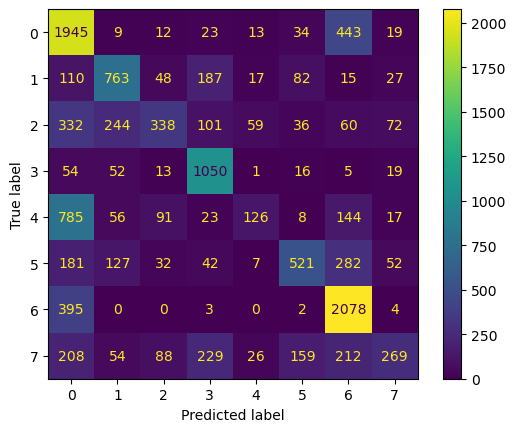

In [ ]:
evaluation(ridge_classifier,y_test)

## Feature Importance Comparision of the top two classifiers : Random Forest and Gradient Boosting

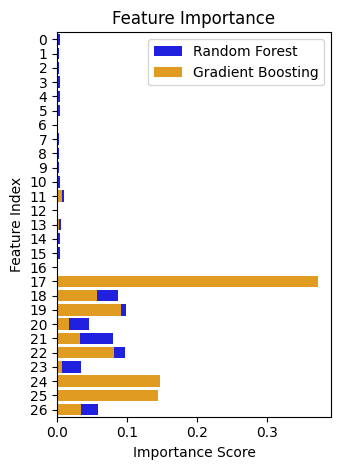

In [25]:
# Plot Feature Importance
plt.subplot(1, 2, 2)
feature_importance_rf = best_rf_classifier.feature_importances_
feature_importance_gb = best_gb_classifier.feature_importances_

sns.barplot(x=feature_importance_rf, y=list(range(len(feature_importance_rf))), orient='h', color='blue', label='Random Forest')
sns.barplot(x=feature_importance_gb, y=list(range(len(feature_importance_gb))), orient='h', color='orange', label='Gradient Boosting')

plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature Index')
plt.legend()
plt.tight_layout()
plt.show()

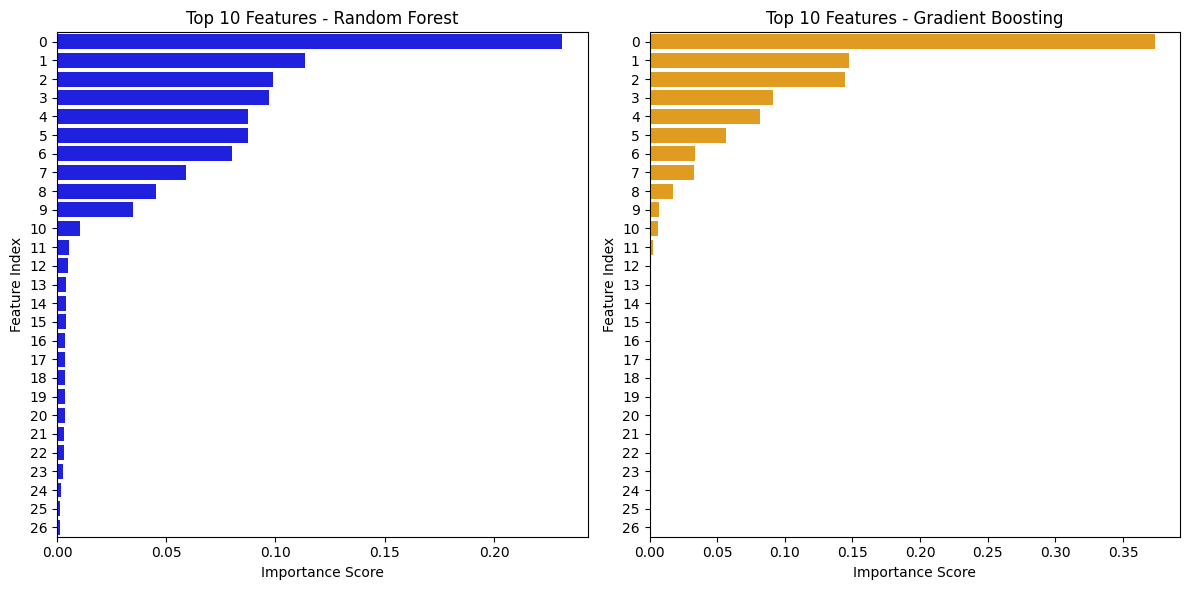

In [26]:
# Feature importance for Random Forest
feature_importance_rf = best_rf_classifier.feature_importances_
indices_rf = np.argsort(feature_importance_rf)[::-1]

# Feature importance for Gradient Boosting
feature_importance_gb = best_gb_classifier.feature_importances_
indices_gb = np.argsort(feature_importance_gb)[::-1]


# Plot Feature Importance for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importance_rf[indices_rf], y=list(range(len(feature_importance_rf))), orient='h', color='blue')
plt.title('Top 10 Features - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature Index')

# Plot Feature Importance for Gradient Boosting
plt.subplot(1, 2, 2)
sns.barplot(x=feature_importance_gb[indices_gb], y=list(range(len(feature_importance_gb))), orient='h', color='orange')
plt.title('Top 10 Features - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature Index')

plt.tight_layout()
plt.show()

In [27]:
# Assuming feature_names is a list containing the names of your features
feature_names = list(X_train.columns)
for i, feature in enumerate(feature_names):
    print(f"Index {i}: {feature}")

Index 0: key_A
Index 1: key_A#
Index 2: key_B
Index 3: key_C
Index 4: key_C#
Index 5: key_D
Index 6: key_D#
Index 7: key_E
Index 8: key_F
Index 9: key_F#
Index 10: key_G
Index 11: mode_Major
Index 12: tempo_34-71
Index 13: tempo_71-108
Index 14: tempo_108-145
Index 15: tempo_145-183
Index 16: tempo_183-220
Index 17: popularity
Index 18: acousticness
Index 19: danceability
Index 20: duration_ms
Index 21: energy
Index 22: instrumentalness
Index 23: liveness
Index 24: loudness
Index 25: speechiness
Index 26: positivity


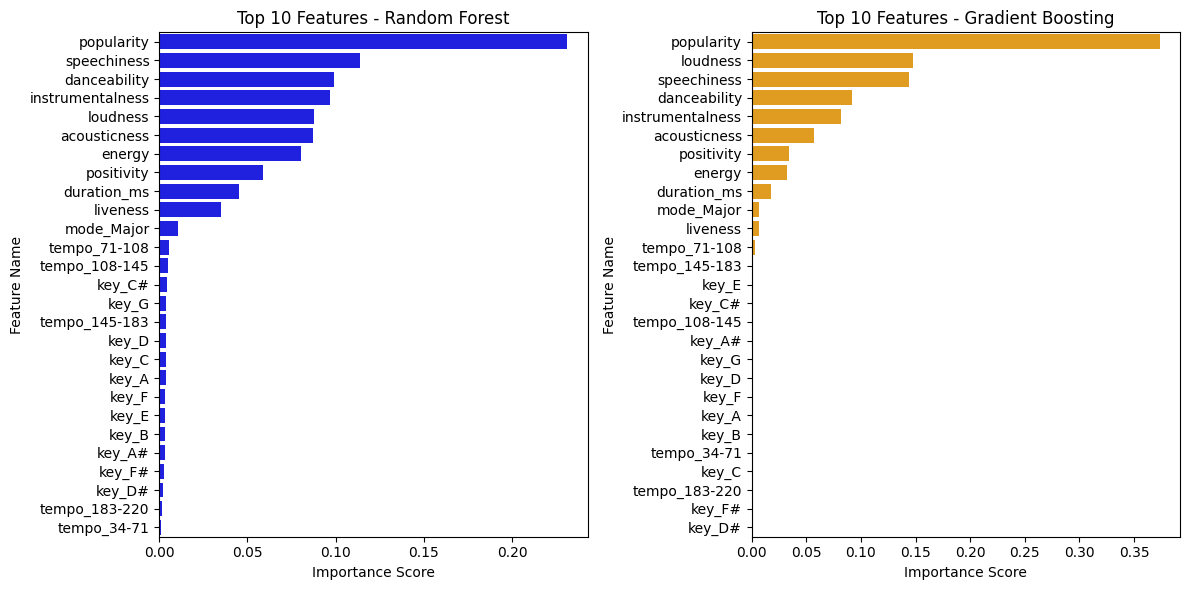

In [28]:
# Plot Feature Importance for Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importance_rf[indices_rf], y=[feature_names[i] for i in indices_rf], orient='h', color='blue')
plt.title('Top 10 Features - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')

# Plot Feature Importance for Gradient Boosting
plt.subplot(1, 2, 2)
sns.barplot(x=feature_importance_gb[indices_gb], y=[feature_names[i] for i in indices_gb], orient='h', color='orange')
plt.title('Top 10 Features - Gradient Boosting')
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')

plt.tight_layout()
plt.show()